In [1]:
# 1. Get essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from vnstock import *

Observations:  1630


<Axes: xlabel='Time'>

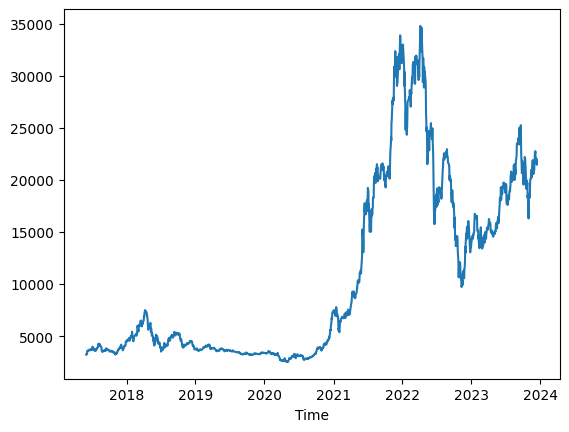

In [2]:
#2. Fetch data and visualize
VND = stock_historical_data(symbol = "VND", start_date="2017-06-01", end_date="2023-12-15", resolution="1D", type = "stock", beautify=True, decor=True, source = "DNSE")
from matplotlib import pyplot
print("Observations: ",len(VND['Close']))
VND
VND["Close"].plot()

In [3]:
# Preprocessing
df = VND['Close']
df=df.reset_index()
df['Lag1'] = range(0, 1630)
df['Lag2'] = df['Lag1'].shift(1)
df['Lag3'] = df['Lag2'].shift(1)
df = df.dropna()
df

,Time,Close,Lag1,Lag2,Lag3
2,2017-06-05,3280,2,1.0,0.0
3,2017-06-06,3320,3,2.0,1.0
4,2017-06-07,3590,4,3.0,2.0
5,2017-06-08,3540,5,4.0,3.0
6,2017-06-09,3560,6,5.0,4.0
...,...,...,...,...,...
1625,2023-12-11,21950,1625,1624.0,1623.0
1626,2023-12-12,22050,1626,1625.0,1624.0
1627,2023-12-13,21600,1627,1626.0,1625.0
1628,2023-12-14,21450,1628,1627.0,1626.0


In [4]:
#3. Slit the data into train : test with ratio 8:2
train_size = int(0.6 * len(df))
test_size = int(0.4 * len(df))

train_data = df[:train_size]
test_data = df[train_size:]

In [5]:
#4. Training process
x_train = np.array([train_data['Lag1'],train_data['Lag2'], train_data['Lag3']]).reshape(-1, 3)
y_train = np.array(train_data['Close'])

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [6]:
# 5. Testing process
x_test = np.array([test_data['Lag1'],test_data['Lag2'], test_data['Lag3']]).reshape(-1, 3)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)
y_pred

array([5313.49281042, 5320.07091137, 5326.64901231, 5333.22711326,
       5339.8052142 , 5346.38331514, 5352.96141609, 5359.53951703,
       5366.11761798, 5372.69571892, 5379.27381987, 5385.85192081,
       5392.43002176, 5399.0081227 , 5405.58622365, 5412.16432459,
       5418.74242554, 5425.32052648, 5431.89862743, 5438.47672837,
       5445.05482932, 5451.63293026, 5458.21103121, 5464.78913215,
       5471.36723309, 5477.94533404, 5484.52343498, 5491.10153593,
       5497.67963687, 5504.25773782, 5510.83583876, 5517.41393971,
       5523.99204065, 5530.5701416 , 5537.14824254, 5543.72634349,
       5550.30444443, 5556.88254538, 5563.46064632, 5570.03874727,
       5576.61684821, 5583.19494916, 5589.7730501 , 5596.35115105,
       5602.92925199, 5609.50735293, 5616.08545388, 5622.66355482,
       5629.24165577, 5635.81975671, 5642.39785766, 5648.9759586 ,
       5655.55405955, 5662.13216049, 5668.71026144, 5675.28836238,
       5681.86646333, 5688.44456427, 5695.02266522, 5701.60076

In [7]:
# 6. 60 days prediction
last_index =  len(df)
last_data = pd.RangeIndex(start=last_index, stop=last_index+60, step=1)
range_arr_1 = np.array(range(last_index+1, last_index+61))
range_arr_2 = np.array(range(last_index, last_index+60))
range_arr_3 = np.array(range(last_index-1, last_index+59))

# Create an array of 60 consecutive integers starting from last_index
x_next_60_days = np.array([range_arr_1,
                          range_arr_2, 
                          range_arr_3]).reshape(-1, 3)

# Predict the closing prices for the next 60 days
y_next_60_days = model.predict(x_next_60_days)

# Print the predicted closing prices for the next 60 days
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

Predicted closing prices for the next 60 days:
[6740.94071543 6747.51881638 6754.09691732 6760.67501827 6767.25311921
 6773.83122015 6780.4093211  6786.98742204 6793.56552299 6800.14362393
 6806.72172488 6813.29982582 6819.87792677 6826.45602771 6833.03412866
 6839.6122296  6846.19033055 6852.76843149 6859.34653244 6865.92463338
 6738.74801512 6745.32611606 6751.90421701 6758.48231795 6765.0604189
 6771.63851984 6778.21662078 6784.79472173 6791.37282267 6797.95092362
 6804.52902456 6811.10712551 6817.68522645 6824.2633274  6830.84142834
 6837.41952929 6843.99763023 6850.57573118 6857.15383212 6863.73193307
 6736.5553148  6743.13341575 6749.71151669 6756.28961764 6762.86771858
 6769.44581952 6776.02392047 6782.60202141 6789.18012236 6795.7582233
 6802.33632425 6808.91442519 6815.49252614 6822.07062708 6828.64872803
 6835.22682897 6841.80492992 6848.38303086 6854.96113181 6861.53923275]


In [8]:
# 7. Evaluation
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

#MAPE
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Testing MAPE:', test_mape)

#MAE
test_mae = np.mean(np.abs(y_pred - y_test))
print('Testing MAE:', test_mae)

def MSLE (pred, actual):
    return np.mean((np.log(1+actual)-np.log(1+pred))*(np.log(1+actual)-np.log(1+pred)))
print("MSLR: ", MSLE(y_pred, y_test))

Testing RMSE: 15436.708964043512
Testing MAPE: 68.00788764393305
Testing MAE: 14320.525083091305
MSLR:  1.4680047072560776


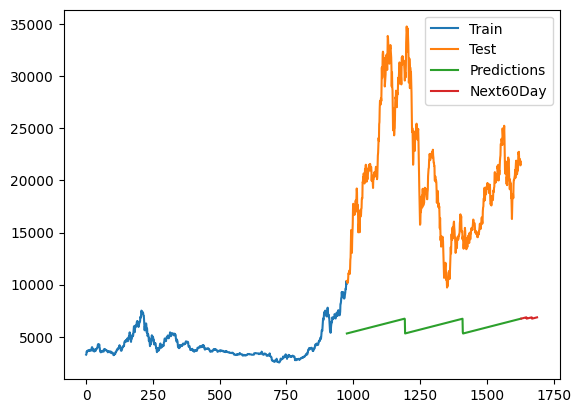

In [9]:
train_range = range(train_size)
test_range = range(train_size, train_size+test_size+1)

# 8.Visualize the result
plt.plot(train_range, train_data['Close'])
plt.plot(test_range, test_data['Close'])
plt.plot(test_range, y_pred)
plt.plot(range_arr_1,y_next_60_days)
plt.legend(['Train', 'Test','Predictions', 'Next60Day'])
plt.show()